# Otimização de Carteira de Investimento

### Ciro Cavani
#### BigData - Globo.com

### Aplicações, Modelos e Métodos - INF2982
#### Prof. Thibaut Vidal
#### 2015-2

## Abstract

O propósito é entender modelagem conceitual e aplicar ferramentas de otimização para tratar um problema real. O tema abordado é a otimização de uma carteira de investimento composta por ativos. O objetivo é determinar a proporção em que se deve investir em cada ativo de tal forma que o risco seja baixo e acima de um retorno mínimo. É usado o modelo básico desse problema, um Programa Quadrático. A modelagem foi feita com JuMP (uma extensão da linguagem de programação Julia) com o solver Ipopt (otimização não-linear). A análise foi feita com o histórico do preço dos títulos negociados na BMFBovespa no mês de Novembro/2015. Os resultados mostram que, apesar do modelo ser simples, essa técnica é muito relevante para encontrar soluções em problemas complexos.


## 1 Introdução

Esse trabalho é baseado no paper *Simulated annealing for complex portfolio selection problems* (Y. Crama, M. Schyns). O paper apresenta um algoritmo para a solução de Seleção de Ativos para Carteira de Investimentos baseado na meta-heurística *Simulated Annealing*. A principal contribuição é o tratamento da vizinhança da solução em conjunto com o tratamento das violações das restrições da carteira de crédito. Também é um tema importante desse paper a questão do 'resfriamento' da exploração de soluções e a condição de parada.

O propósito do trabalho atual é entender a modelagem conceitual e aplicar ferramentas de otimização para tratar um problema real similar ao abordado no paper. O tema desse trabalho é a otimização de uma carteira de investimento composta por ativos. O objetivo é determinar a proporção em que se deve investir em cada ativo de tal forma que o risco seja baixo e acima de um retorno mínimo. É usado o modelo básico desse problema, um Programa Quadrático.

A ferramenta usada nesse trabalho foi o JuMP, uma extensão da linguagem de programação Julia para modelagem de Programas Matemáticos que pode usar vários Solvers. Julia é uma linguagem de propósito geral com suporte a computação científica. Esse trabalho fez uso extensivo das bibliotecas de manipulação de dados e visualização desse sistema.

Esse artigo está dividido da seguinte forma: na Seção 2 é discutido o modelo básico (Programa Quadrático); na Seção 3 é discutido a implementação usando JuMP e Ipopt; na Seção 4 é discutido os resultados com dados da BMFBovespa, e; na Seção 5, a conclusão.

## 2 Modelo

O modelo básico é um Programa Quadrático baseado somente nos dados de retorno dos ativos. A solução desse programa é a proporção com que se deve investir em cada ativo para minimizar o risco e com um retorno mínimo pré-definido. Esse modelo pode ser estendido para considerar restrições mais realistas tornando-o um Programa Misto Inteiro Quadrático, contudo, esse tópico não é discutido nesse trabalho (ver discussão no *paper*).

### 2.1 Modelo Básico: Programa Quadrático

$$
\begin{align}
\text{minimize} \qquad & \sum_{i=1}^{n}\sum_{j=1}^{n} C_{ij} x_{i} x_{j} \\
 \text{subject to} \quad \quad & \sum_{i=1}^{n} R_{i} x_{i} = R_{exp} \\
 \qquad \qquad & \sum_{i=1}^{n} x_{i} = 1 \\
 \qquad \qquad & x_{i} \ge 0 & i = 1, \ldots, n \\
\end{align}
$$

$n$ = número de ativos

Variável de Decisão:

$x \in \mathbb{R}_{+}^n$: proporção de investimento em cada ativo

Parâmetros:

$C \in \mathbb{R}^{n \times n}$: matriz de covariança do retorno dos ativos<br/>
$R \in \mathbb{R}^n$: retorno médio de cada ativo<br/>
$R_{exp} \in \mathbb{R}$: retorno esperado para carteira<br/>

## 3 Implementação

A modelagem do Programa Quadrático foi feita com o JuMP, uma extensão da linguagem de programação Julia, independente de Solver. Para resolver o programa não-linear, foi usado o Solver Ipopt que utiliza o método de Ponto Interior para otimização. Julia, JuMP e Ipopt são ferramentas *open-source*, de uso livre tanto acadêmico quanto comercial.

### 3.1 JuMP

http://www.juliaopt.org/

*An algebraic modeling language for linear, quadratic, and nonlinear constrained optimization problems embedded in Julia. Generates models as quick as commercial modeling tools and supports advanced features like solver callbacks.*

### 3.2 Ipopt

https://projects.coin-or.org/Ipopt

Ipopt (**I**nterior **P**oint **OPT**imizer, pronounced eye-pea-Opt) is a software package for large-scale nonlinear optimization.

### 3.3 Código

A listagem abaixo mostra a implementação do Programa Quadrático em JuMP e a solução usando Ipopt.

(Assumindo que o ambiente já tenha Julia, JuMP e Ipopt instalados)

In [11]:
using JuMP, Ipopt

n = 5  # número de ativos
t = 10 # número de observações
data = randn(t, n) # dados sintéticos

10x5 Array{Float64,2}:
  1.88646      0.33906     0.477717   -0.455587  -0.57679 
 -0.92273     -0.961261   -0.351044    1.74276    0.75191 
  2.46056     -1.38418    -0.507628   -0.145125  -0.273544
 -1.52419     -0.50971    -1.27535     0.268001  -1.44999 
 -0.754799    -0.199515   -1.05524    -0.915387   0.307635
  1.76078     -0.0317435  -1.47405     0.314694   0.593515
  0.0986528   -0.817138    1.27927     0.785064   0.743253
  0.271369     0.0327772   2.16746    -0.269151   1.14845 
 -1.76069      0.0790836  -0.0772569  -0.509854  -1.3918  
 -0.00534029   0.034318   -0.505856   -0.685586  -0.787159

In [12]:
# covariança e retorno médio
C, R = cov(data), mean(data, 1)

(
5x5 Array{Float64,2}:
  2.15701    -0.0780676  0.130411   -0.122435    0.394306
 -0.0780676   0.307033   0.0733104  -0.251399   -0.100787
  0.130411    0.0733104  1.32705     0.0254247   0.452368
 -0.122435   -0.251399   0.0254247   0.632409    0.296139
  0.394306   -0.100787   0.452368    0.296139    0.873667,

1x5 Array{Float64,2}:
 0.151007  -0.341831  -0.132197  0.0129828  -0.0934518)

In [13]:
# Retorno esperado
R_exp = 0.1

0.1

In [14]:
# Modelo básico, Programa Quadrático
model = Model(solver = IpoptSolver(print_level=0))
@defVar(model, x[1:n] ≥ 0)
@setObjective(model, Min, sum{C[i,j] * x[i] * x[j], i=1:n, j=1:n})
@addConstraint(model, sum{R[i] * x[i], i=1:n} ≥ R_exp)
@addConstraint(model, sum(x) == 1)

println("The optimization problem to be solved is:\n\n", model)

The optimization problem to be solved is:

Min 2.1570105175044167 x[1]² - 0.15613512845894667 x[1]*x[2] + 0.30703298789881356 x[2]² + 0.2608215302081941 x[1]*x[3] + 0.14662089430149725 x[2]*x[3] + 1.327053841175897 x[3]² - 0.24487018835132954 x[1]*x[4] - 0.5027988337505165 x[2]*x[4] + 0.05084935135176438 x[3]*x[4] + 0.6324092476078689 x[4]² + 0.7886117966092855 x[1]*x[5] - 0.2015745069289811 x[2]*x[5] + 0.9047365905898476 x[3]*x[5] + 0.5922782884620049 x[4]*x[5] + 0.8736671828128039 x[5]²
Subject to
 0.15100698623728864 x[1] - 0.3418309042977621 x[2] - 0.13219726263641934 x[3] + 0.012982831541692875 x[4] - 0.09345176093365631 x[5] ≥ 0.1
 x[1] + x[2] + x[3] + x[4] + x[5] = 1
 x[i] ≥ 0 ∀ i ∈ {1,2,…,4,5}



In [15]:
# Execução do Solver
status = solve(model)

println("Status of the problem is ", status, "\n")

if status == :Optimal
    println("Objective value:\n\n", getObjectiveValue(model), "\n")
    println("Optimal solution:\n\n", "x = ", getValue(x))
end

Status of the problem is Optimal

Objective value:

0.8866538073380239

Optimal solution:

x = [0.6304487253791535,0.0,0.0,0.3695513046000083,0.0]


## 4 Resultados

Nesse trabalho foi utilizada a série histórica de negociações de títulos da BMFBovespa. Os ativos usados são as ações de foram negociadas todos os dias do mês de Novembro/2015.

Para mais informações sobre os dados e as análises, consulte os notebooks anexos desse trabalho:

* [Preparação de Dados - Cotações Bovespa](https://rawgit.com/cirocavani/puc-inf2982/master/Preparação de Dados - Cotações Bovespa.html)
* [Análise - Otimização de Carteira de Investimento](https://rawgit.com/cirocavani/puc-inf2982/master/Análise - Otimização de Carteira de Investimento.html).

### 4.1 Dados da BMFBovespa

Os dados foram coletados da página da BMFBovespa [aqui](http://www.bmfbovespa.com.br/shared/iframe.aspx?idioma=pt-br&url=http://www.bmfbovespa.com.br/pt-br/cotacoes-historicas/FormSeriesHistoricas.asp) (manual em [pdf](http://www.bmfbovespa.com.br/pt-br/download/SeriesHistoricas_Layout.pdf)).

A preparação desses dados está no anexo [aqui](https://rawgit.com/cirocavani/puc-inf2982/master/Preparação de Dados - Cotações Bovespa.html).

Dados: histórico do preço dos títulos negociados na BMFBovespa no mês de Novembro/2015.

* 5995 movimentações, 19 dias, 451 ações, 369 empresas
* ~17 milhões de negociações, 8,3 bilhões de títulos, 110 bilhões de reais

Dicionário simplificado das colunas de interesse:

* **CODBDI**: CÓDIGO DE CLASSIFICAÇÃO ('02' é 'Lote Padrão')
* **CODNEG**: CÓDIGO DE NEGOCIAÇÃO DO PAPEL
* **TPMERC**: CÓD. DO MERCADO EM QUE O PAPEL ESTÁ CADASTRADO ('010' é 'A Vista')
* **NOMRES**: NOME RESUMIDO DA EMPRESA EMISSORA DO PAPEL
* **MODREF**: MOEDA DE REFERÊNCIA
* **PREABE**: PREÇO DE ABERTURA DO PAPEL-MERCADO NO PREGÃO (2 casas decimais)
* **PREULT**: PREÇO DO ÚLTIMO NEGÓCIO DO PAPEL-MERCADO NO PREGÃO (2 casas decimais)
* **TOTNEG**: NÚMERO DE NEGÓCIOS EFETUADOS COM O PAPELMERCADO NO PREGÃO
* **QUATOT**: QUANTIDADE TOTAL DE TÍTULOS NEGOCIADOS NESTE PAPELMERCADO
* **VOLTOT**: VOLUME TOTAL DE TÍTULOS NEGOCIADOS NESTE PAPELMERCADO (2 casa decimais)

Para efeito desse trabalho, está sendo usado o 'retorno de investimento' do dia, definido pela razão entre a diferença de preço entre a última negociação e a abertura pelo preço da abertura. Esse valor está calculado na coluna **RET**.

In [16]:
using DataFrames
data = readtable("data.tsv")
head(data)

,DATE,CODBDI,CODNEG,TPMERC,NOMRES,MODREF,PREABE,PREULT,TOTNEG,QUATOT,VOLTOT,RET
1,2015-11-03,2,ABCB4,10,ABC BRASIL,R$,8.49,8.8,1068,257000,2.243335e6,0.03651354534746767
2,2015-11-04,2,ABCB4,10,AMBEV S/A,R$,19.1,19.6,32307,13504000,2.61856419e8,0.02156640181611799
3,2015-11-05,2,ABCB4,10,BRASILAGRO,R$,10.7,10.9,77,21000,226828.0,0.015538290788013382
4,2015-11-06,2,ABCB4,10,ALPARGATAS,R$,9.58,9.71,14,11200,108100.0,-0.016375545851528422
5,2015-11-09,2,ABCB4,10,ALPARGATAS,R$,8.19,8.6,1394,718900,6.141464e6,0.006651884700665244
6,2015-11-10,2,ABCB4,10,ALIANSCE,R$,10.44,11.12,1360,378700,4.191205e6,-0.0022050716648290597


### 4.2 Análise

A primeira tentativa foi usar somente os títulos que tiveram movimentação todos os dias (19 dias), num total de 209 títulos. Nesse caso, o JuMP não conseguiu criar o Programa Quadrático.

A segunda tentativa foi ordenar os títulos que tiveram maior retorno médio e considerar apenas os 10 primeiros. Nesse caso, o JuMP conseguiu criar o Programa Quadrático e o Ipopt conseguiu resolver com solução ótima em cerca de 10 iterações.

In [17]:
df = readtable("maxreturn.tsv")
assets, R, C = readdlm("maxreturn-n.tsv"), readdlm("maxreturn-R.tsv"), readdlm("maxreturn-C.tsv")

println("Returns: mean, variance\n")
for i=1:length(assets)
    a, m, v = assets[i], round(R[i], 4), round(C[i,i], 4)
    println(a, " = (", m, ", ", v, ")")
end

Returns: mean, variance

BRIN3 = (0.0131, 0.001)
BRKM5 = (0.0088, 0.0006)
CSMG3 = (0.0109, 0.001)
ELET3 = (0.0117, 0.0016)
LOGN3 = (0.0237, 0.0167)
MAGG3 = (0.0109, 0.0006)
PNVL3 = (0.0125, 0.0006)
POSI3 = (0.0084, 0.0009)
ROMI3 = (0.0111, 0.0012)
VIVR3 = (0.0833, 0.0594)


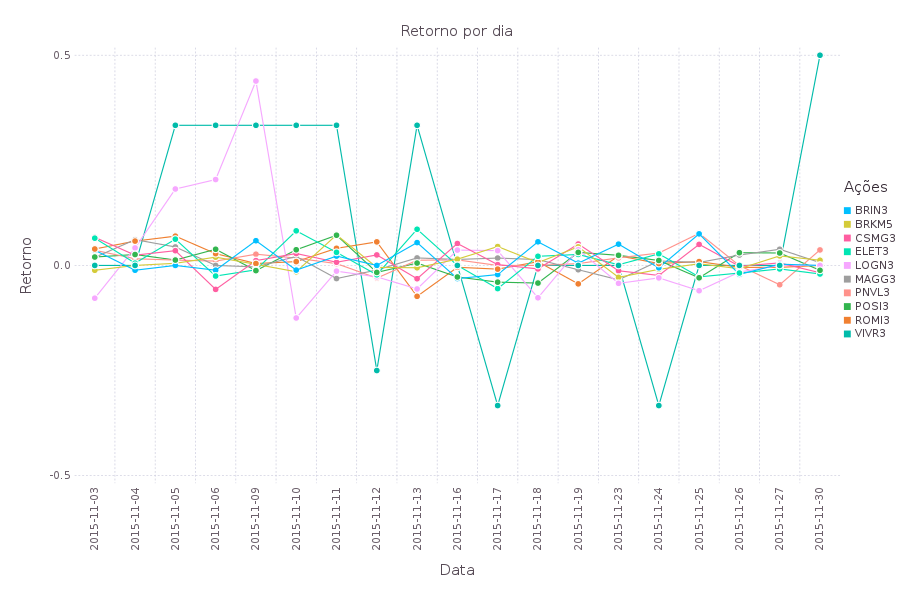

In [18]:
using Gadfly
set_default_plot_size(24cm, 16cm)

p(df) = layer(df, x = :DATE, y = :RET, color = :CODNEG, Geom.line, Geom.point)
rplot(g) = plot(g, Guide.title("Retorno por dia"), Guide.xlabel("Data"), Guide.ylabel("Retorno"), Guide.colorkey("Ações"))
g = Array(Layer, 0)
for q in unique(df[:CODNEG])
    push!(g, p(df[df[:CODNEG] .== q, :])...)
end
rplot(g)

In [19]:
n = length(assets)

function opt(R_exp)
    model = Model(solver = IpoptSolver(print_level=0))
    @defVar(model, x[1:n] ≥ 0)
    @setObjective(model, Min, sum{C[i,j] * x[i] * x[j], i=1:n, j=1:n})
    @addConstraint(model, sum{R[i] * x[i], i=1:n} ≥ R_exp)
    @addConstraint(model, sum(x) == 1)
    solve(model)
    round(getValue(x), 2)
end

rexpdf = DataFrame(CODNEG = vec(assets), R_mean = round(vec(R), 4))
for R_exp=[0.0, 0.02, 0.04, 0.06, 0.08]
    rexpdf[symbol(string("R_exp=", R_exp))] = opt(R_exp)
end
rexpdf

,CODNEG,R_mean,R_exp=0.0,R_exp=0.02,R_exp=0.04,R_exp=0.06,R_exp=0.08
1,BRIN3,0.0131,0.17,0.22,0.05,0.0,0.0
2,BRKM5,0.0088,0.25,0.0,0.0,0.0,0.0
3,CSMG3,0.0109,0.01,0.22,0.53,0.32,0.05
4,ELET3,0.0117,0.0,0.0,0.0,0.0,0.0
5,LOGN3,0.0237,0.0,0.01,0.02,0.0,0.0
6,MAGG3,0.0109,0.28,0.31,0.0,0.0,0.0
7,PNVL3,0.0125,0.13,0.03,0.0,0.0,0.0
8,POSI3,0.0084,0.11,0.0,0.0,0.0,0.0
9,ROMI3,0.0111,0.06,0.09,0.0,0.0,0.0
10,VIVR3,0.0833,0.0,0.12,0.4,0.68,0.95


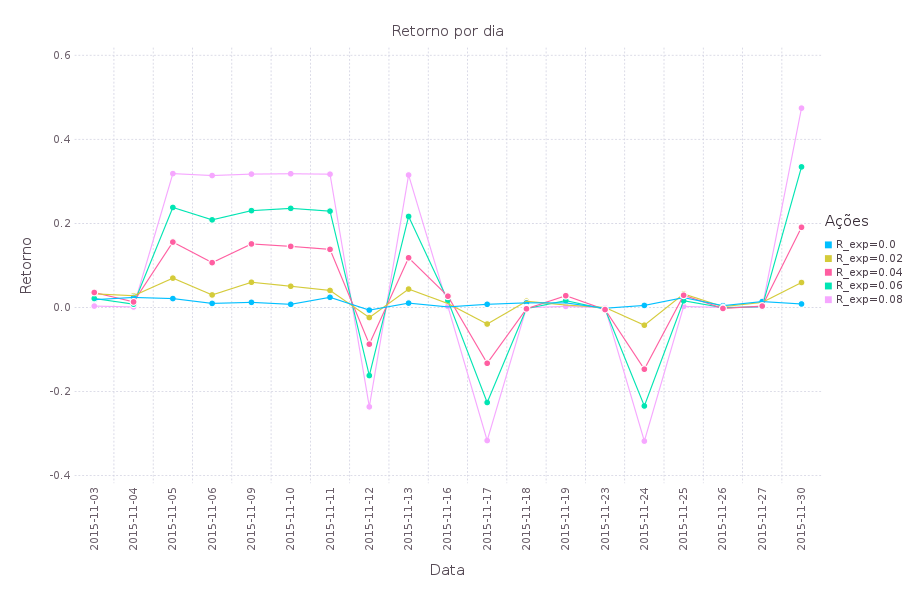

In [20]:
function optret(xopt, name)
    r = nothing
    for i=1:n
        xopt[i] == 0.0 && continue
        q = assets[i]
        s = df[df[:CODNEG] .== q, :][:RET] * xopt[i]
        if r === nothing
            r = s
        else
            r += s
        end
    end
    DataFrame(DATE = unique(df[:DATE]), CODNEG = fill(name, length(r)), RET = r)
end

g = Array(Layer, 0)
for name=map(r -> string("R_exp=", r), [0.0, 0.02, 0.04, 0.06, 0.08])
    optdf = optret(rexpdf[symbol(name)], name)
    push!(g, p(optdf)...)
end
rplot(g)

## 5 Conclusão

Nesse trabalho foi explorado a modelagem básica do problema de seleção de ativos para uma carteira de investimento. Nesse modelo, a decisão é de como dividir quanto é investido em cada ativo, de tal forma que o risco da aplicação seja mínimo (objetivo) e restringido por um retorno mínimo (parâmetro do modelo).

Fazendo a análise para um *dataset* real, histórico do preço dos títulos negociados na BMFBovespa no mês de Novembro/2015, é possível ver que diferentes expectativas alteram bastante a configuração da solução.

Esse trabalho também mostra que as ferramentas disponíveis hoje *open-source* (livre para uso acadêmico e comercial) oferecem qualidade ao par das ferramentas comerciais.

Por fim, um objetivo secundário desse trabalho foi exercitar o conceito de *reproducible research*, com a criação de documentos dinâmicos que tornam possível fazer apresentações com código executável embutido, relatórios que geram dinamicamente a visualização de dados e modelos, análises e preparação de dados *in loco* para possível reutilização.

O principal contribuição foi mostrar que, apesar do modelo ser simples, essa técnica é muito relevante para encontrar soluções em problemas complexos.

### References

**Simulated annealing for complex portfolio selection problems**

http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.97.6091

*This paper describes the application of a simulated annealing approach to the solution of a complex portfolio selection model. The model is a mixed integer quadratic programming problem which arises when Markowitz’ classical mean–variance model is enriched with additional realistic constraints. Exact optimization algorithms run into difficulties in this framework and this motivates the investigation of heuristic techniques. Computational experiments indicate that the approach is promising for this class of problems.*